In [1]:
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor


df = pandas.read_csv("winequality/winequality-red.csv", delimiter=";")

 

In [2]:
 # Split-out validation dataset
array = df.values
X = array[:,0:11]
Y = array[:,11]
Y = np.asarray(Y, dtype="|S6")
validation_size = 0.15
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'



In [3]:
# Check of Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=15, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.574668 (0.051520)
LDA: 0.585039 (0.043580)
KNN: 0.490842 (0.039002)
CART: 0.631347 (0.046417)
NB: 0.548995 (0.041353)
RF: 0.661547 (0.059691)
SVM: 0.568816 (0.035415)


In [8]:
# Evaluating of Algorithms accuracy

raf = RandomForestClassifier()
raf.fit(X_train, Y_train)
predictions = raf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6916666666666667
             precision    recall  f1-score   support

     b'4.0'       0.00      0.00      0.00         4
     b'5.0'       0.67      0.82      0.74        88
     b'6.0'       0.74      0.69      0.71       121
     b'7.0'       0.56      0.38      0.45        26
     b'8.0'       0.00      0.00      0.00         1

avg / total       0.68      0.69      0.68       240



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[ 0  3  1  0  0]
 [ 0 72 16  0  0]
 [ 1 29 84  7  0]
 [ 0  3 13 10  0]
 [ 0  0  0  1  0]]


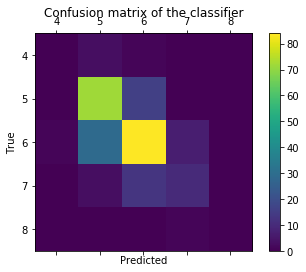

In [9]:
# Confusion metrix check

labels = ['4', '5', '6', '7', '8']
cm = confusion_matrix(Y_validation, predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



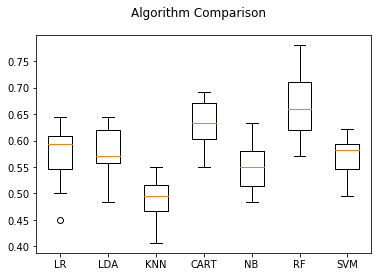

In [6]:
# Algorithms accuracy comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
